In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.shape

(5110, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# Preparation

In [6]:
#Explore missing values
missing_values = (df.isnull().sum())
missing_values


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
#caculate the percentage of missing data in the bmi feature
percentage_missing_values = missing_values/df['bmi'].count()
print('Roughly {}% of data is missing'.format(percentage_missing_values['bmi']))

Roughly 0.040945202688938684% of data is missing


In [8]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [9]:
df[df['gender'] == 'Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [10]:
df.drop(labels=3116, axis=0, inplace=True)

# EDA

In [11]:
# Labeling data fields to Text value for easy interpretation of Visualization
data_eda = df.copy()
#hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
data_eda["hypertension"]     = df["hypertension"]    .map({1: "Yes",           0: "No"})
#1 if the patient had a stroke or 0 if not
data_eda["stroke"]     = df["stroke"]    .map({1: "Yes",           0: "No"})
#0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
data_eda["heart_disease"]  = df["heart_disease"] .map({1: "Yes" ,           0: "No"})

## Gender Pie Chart

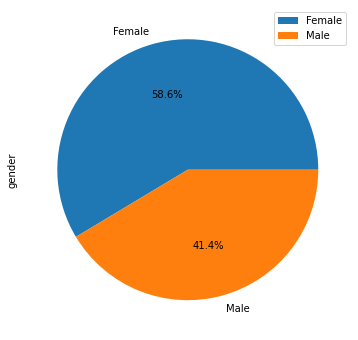

In [12]:
plt.figure(figsize=(6,6))
data_eda['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.legend(loc='upper right')

## Stroke Count Plot Separated by Gender

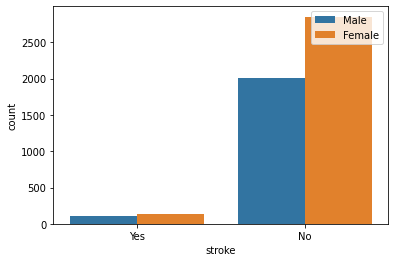

In [13]:
sns.countplot(x='stroke', hue = 'gender', data=data_eda)
plt.legend(loc='upper right')

## Age Distribution

C:\Users\swimt\.conda\envs\School\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

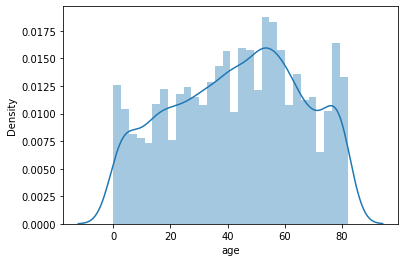

In [14]:
sns.distplot(df['age'], kde=True, bins=30)

## Different Ranges of Age Pie Chart

In [15]:
def age_range(age):
    if   age >= 0 and age <= 20:
        return "0-20"
    elif age > 20 and age <= 40:
        return "20-40"
    elif age > 40 and age <= 50:
        return "40-50"
    elif age > 50 and age <= 60:
        return "50-60"
    elif age > 60:
        return "60+"
    
data_eda['age_group'] = data_eda['age'].apply(age_range)
data_eda.sort_values('age_group', inplace = True)

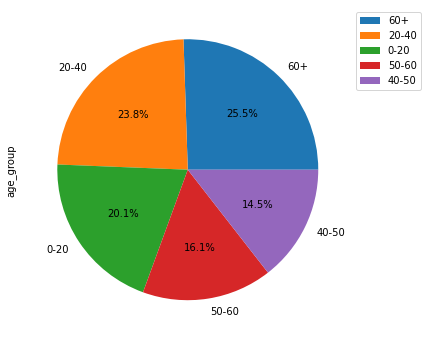

In [16]:
plt.figure(figsize=(6,6))
data_eda['age_group'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.legend(bbox_to_anchor=(1, 1))

## Hypertension Pie Chart

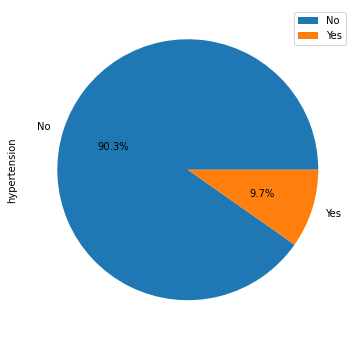

In [17]:
plt.figure(figsize=(6,6))
data_eda['hypertension'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.legend(loc='upper right')

## Hypertension Count Plot Separated by Stroke

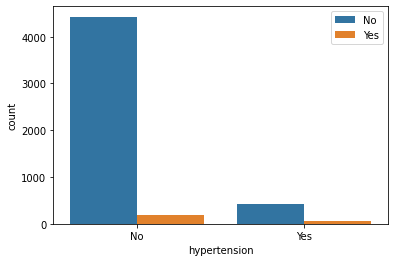

In [18]:
sns.countplot(x='hypertension',hue='stroke', data=data_eda)
plt.legend(loc='upper right')

## Heart Disease Pie Chart

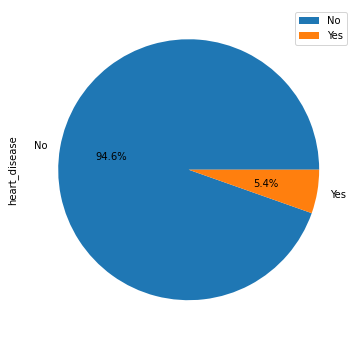

In [19]:
plt.figure(figsize=(6,6))
data_eda['heart_disease'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.legend(loc='upper right')

## Heart Disease Count Plot Separated by Stroke

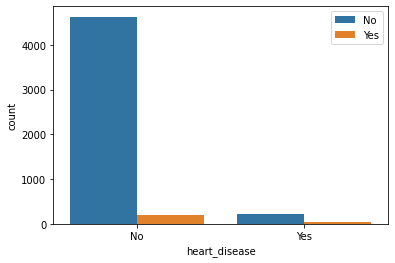

In [20]:
sns.countplot(x='heart_disease', hue='stroke', data=data_eda)
plt.legend(loc='upper right')

## Ever Married Pie Chart

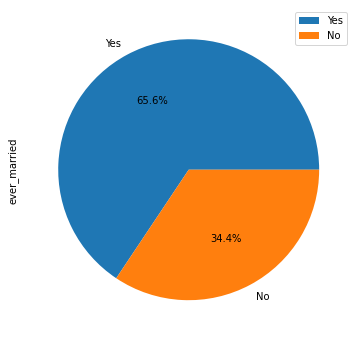

In [21]:
plt.figure(figsize=(6,6))
data_eda['ever_married'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.legend(loc='upper right')

## Ever Married Count Plot Separated by Stroke

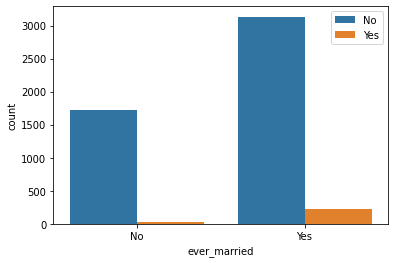

In [22]:
sns.countplot(x='ever_married', hue='stroke', data=data_eda)
plt.legend(loc='upper right')

## Work Type Pie Chart

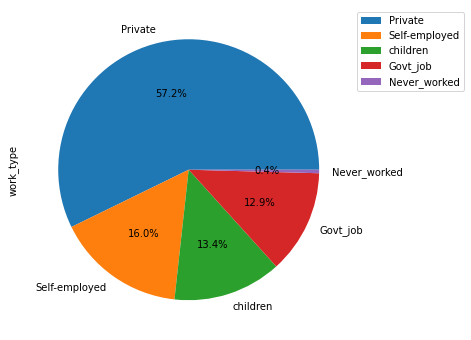

In [23]:
plt.figure(figsize=(6,6))
data_eda['work_type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.legend(bbox_to_anchor=(1, 1))

## Work Type Count Plot Separated by Stroke

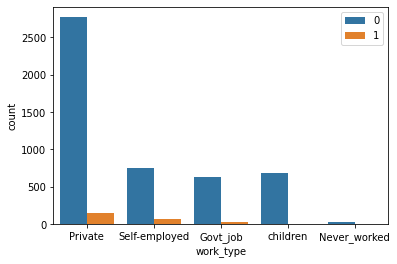

In [24]:
sns.countplot(x='work_type', hue='stroke', data=df)
plt.legend(loc='upper right')

## Residence Type Pie Chart

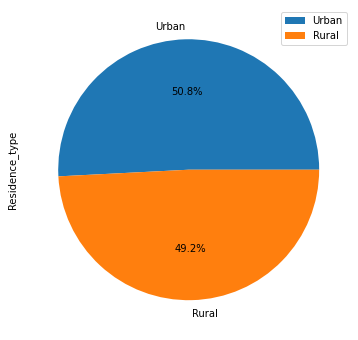

In [25]:
plt.figure(figsize=(6,6))
data_eda['Residence_type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.legend(loc='upper right')

## Average Glucose Level Distribution

C:\Users\swimt\.conda\envs\School\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='avg_glucose_level', ylabel='Density'>

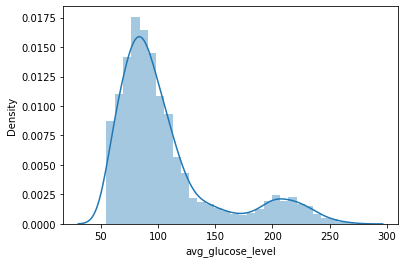

In [26]:
sns.distplot(df['avg_glucose_level'], kde=True, bins=30)

## BMI Distribution

C:\Users\swimt\.conda\envs\School\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

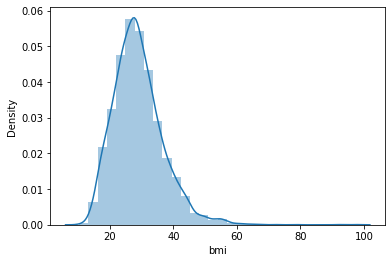

In [27]:
sns.distplot(df['bmi'], kde=True, bins=30)

## Smoking Status Pie Chart

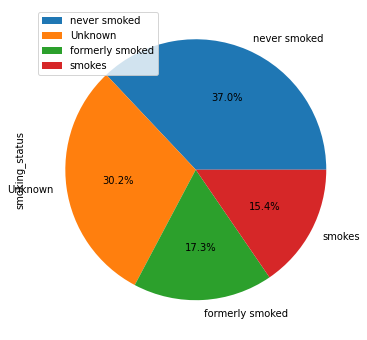

In [28]:
plt.figure(figsize=(6,6))
data_eda['smoking_status'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.legend(loc='upper left')

## Stroke Pie Chart

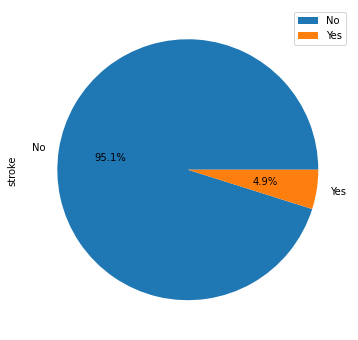

In [29]:
plt.figure(figsize=(6,6))
data_eda['stroke'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.legend(loc='upper right')

## Work Type and Age Boxplot

<AxesSubplot:xlabel='work_type', ylabel='age'>

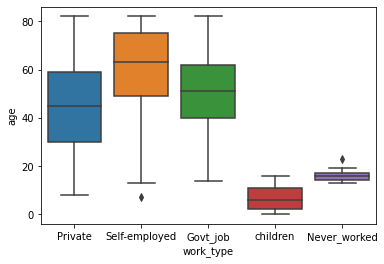

In [30]:
sns.boxplot(x='work_type', y='age', data=df)

<AxesSubplot:xlabel='work_type', ylabel='bmi'>

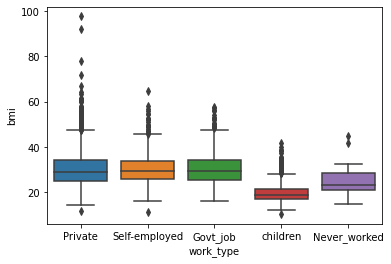

In [31]:
sns.boxplot(x='work_type', y='bmi', data=df)

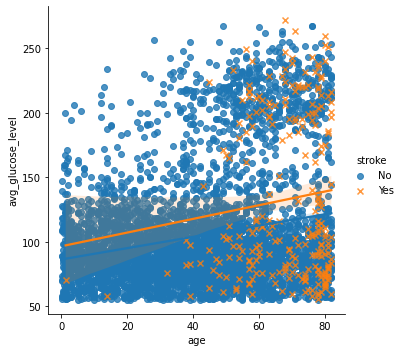

In [32]:
sns.lmplot(x='age', y='avg_glucose_level', hue='stroke', data=data_eda,markers=["o", "x"])

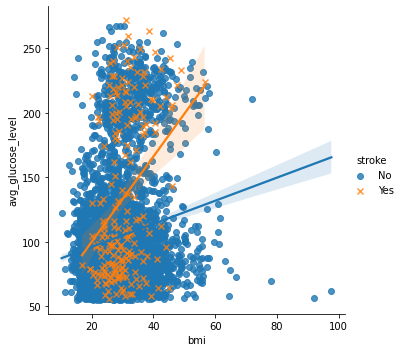

In [33]:
sns.lmplot(x='bmi', y='avg_glucose_level', hue='stroke', data=data_eda,markers=["o", "x"])

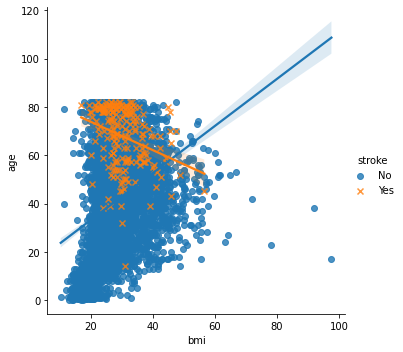

In [34]:
sns.lmplot(x='bmi', y='age', hue='stroke', data=data_eda,markers=["o", "x"])

# Data Cleaning:
To handle missing data, you can either drop the missing data rows or fill in the missing data with statistics formulas. In this case, we are going to fill in the missing bmi data instead of dropping them. Although a simple way to fill in these missing values is to fill in the missing values with the mean BMI of the overall population, we can see below that the average bmi is different for different work_type population. We can see that there is a difference between employed, never_worked, and children. 

In [35]:
print("Private:",df[df['work_type']=='Private']['bmi'].mean())
print("Self-Employed:",df[df['work_type']=='Self-employed']['bmi'].mean())
print("Government Job:",df[df['work_type']=='Govt_job']['bmi'].mean())
print("Children:",df[df['work_type']=='children']['bmi'].mean())
print("Never Worked:",df[df['work_type']=='Never_worked']['bmi'].mean())

Private: 30.307437722419927
Self-Employed: 30.211870967741937
Government Job: 30.522063492063495
Children: 20.038002980625933
Never Worked: 25.545454545454547


## Let's create the function to fill in the average BMI relative to the work type, and apply it to the dataset

In [36]:
def fill_bmi(cols):
    bmi = cols[0]
    work_type = cols[1]
    
    if pd.isnull(bmi):
        if work_type == 'Private':
            return 30.31
        elif work_type == 'Self-employed':
            return 30.21
        elif work_type == 'Govt_job':
            return 30.52
        elif work_type == 'Children':
            return 20.04
        else:
            return 25.55
    else:
        return bmi

In [37]:
df['bmi'] = df[['bmi', 'work_type']].apply(fill_bmi, axis=1)

In [38]:
df.drop(['id'], axis=1, inplace=True)

In [39]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# Feature Engineering

## Correlation Analysis

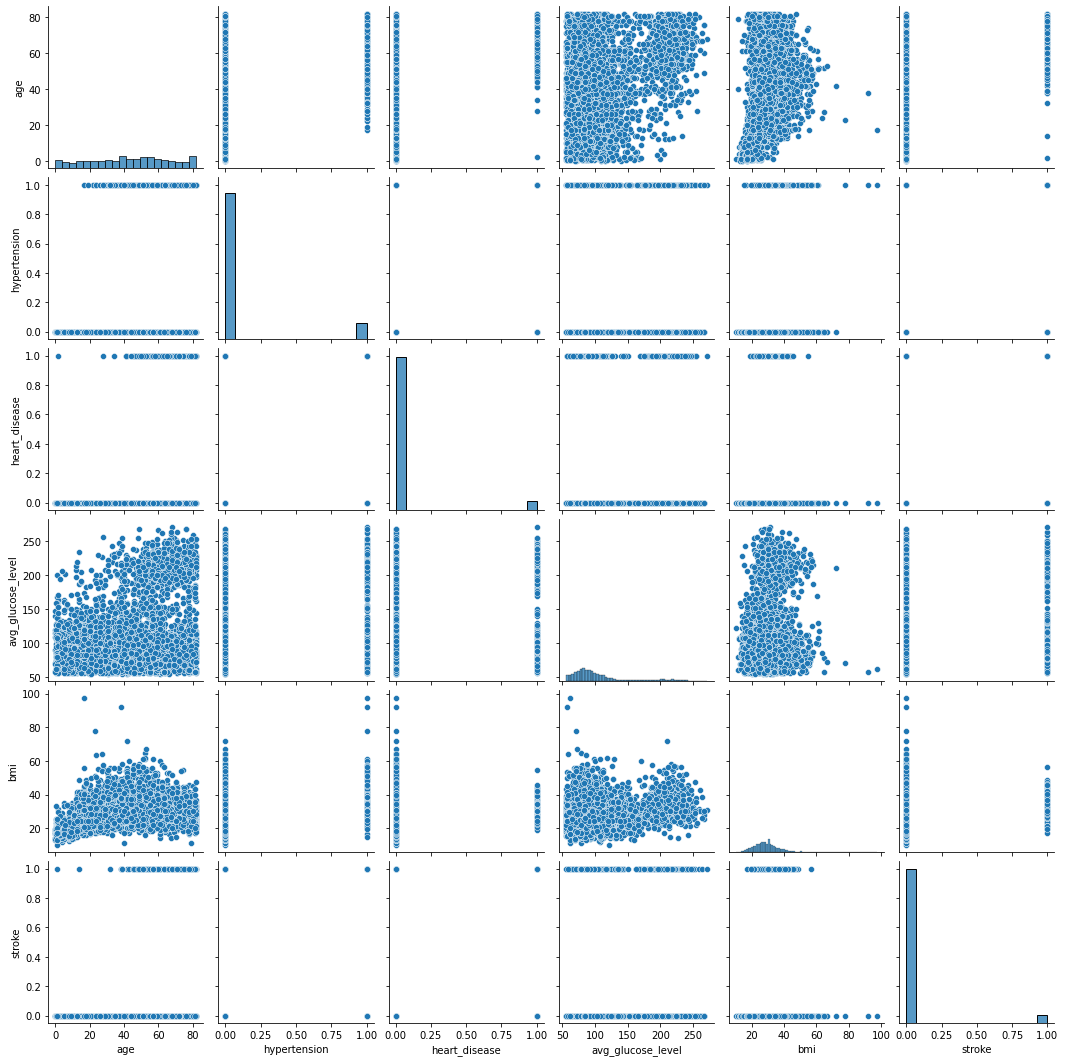

In [40]:
sns.pairplot(df)

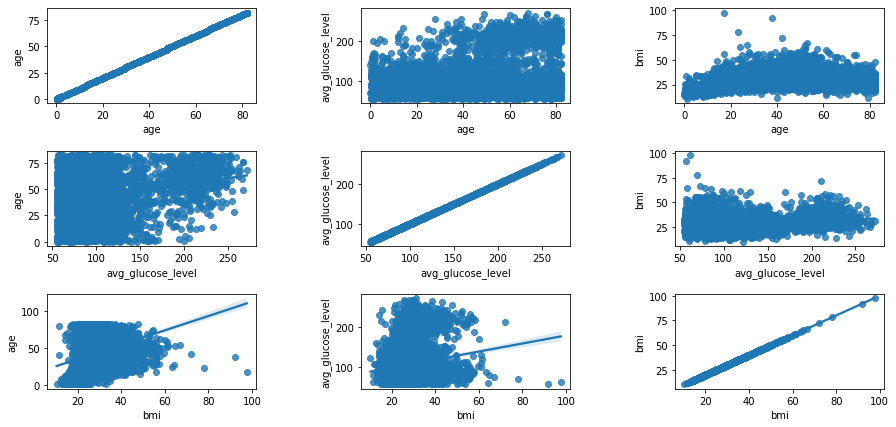

In [41]:
plt.figure(1, figsize=(15,7))
n = 0
for x in ['age','avg_glucose_level','bmi']:
    for y in ['age','avg_glucose_level','bmi']:
        n += 1
        plt.subplot(3,3,n)
        plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
        sns.regplot(x = x, y = y, data = df)
        plt.ylabel(y.split()[0] + ' ' + y.split()[1] if len(y.split()) > 1 else y)

plt.show()

- We can see that the higher the body mass index you get the higher average glucose level
- We can also see that the older you get, the higher your body mass index will be

<AxesSubplot:>

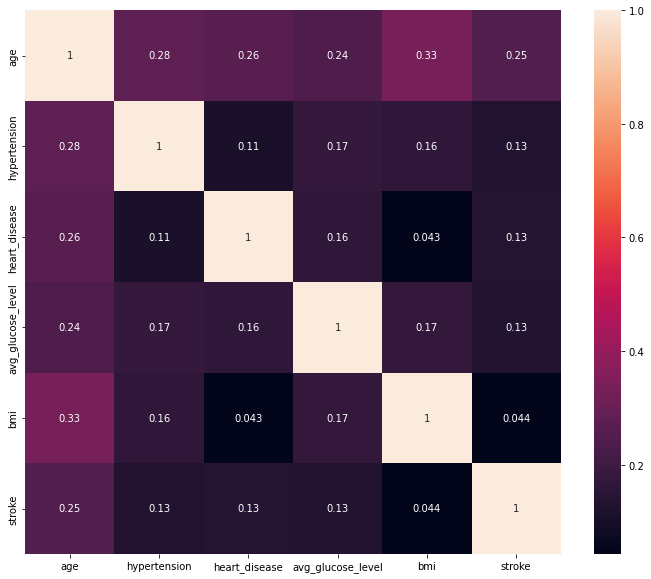

In [42]:
f, ax = plt.subplots(figsize = (12,10))
sns.heatmap(df.corr(), annot=True)

In [43]:
df.corr()['stroke'].sort_values(ascending=False)

stroke               1.000000
age                  0.245239
heart_disease        0.134905
avg_glucose_level    0.131991
hypertension         0.127891
bmi                  0.043777
Name: stroke, dtype: float64

## Converting 'object' Type Columns to 'integer'

In [44]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [45]:
from sklearn import preprocessing
object_columns = ['gender', 'ever_married', 'Residence_type']
label_encoder = preprocessing.LabelEncoder()
for i in object_columns:
    df[i] = label_encoder.fit_transform(df[i])

In [46]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,1,228.69,36.60,formerly smoked,1
1,0,61.0,0,0,1,Self-employed,0,202.21,30.21,never smoked,1
2,1,80.0,0,1,1,Private,0,105.92,32.50,never smoked,1
3,0,49.0,0,0,1,Private,1,171.23,34.40,smokes,1
4,0,79.0,1,0,1,Self-employed,0,174.12,24.00,never smoked,1


In [47]:
df = pd.get_dummies(df)
df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.60,1,0,0,1,0,0,0,1,0,0
1,0,61.0,0,0,1,0,202.21,30.21,1,0,0,0,1,0,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.50,1,0,0,1,0,0,0,0,1,0
3,0,49.0,0,0,1,1,171.23,34.40,1,0,0,1,0,0,0,0,0,1
4,0,79.0,1,0,1,0,174.12,24.00,1,0,0,0,1,0,0,0,1,0


In [48]:
df.shape

(5109, 18)

# Splitting the Dataset into Feature Columns and a Target Column

In [55]:
X = df.drop(columns=['stroke'])
y = df['stroke']
y.value_counts(normalize=True)

0    0.951262
1    0.048738
Name: stroke, dtype: float64

# SMOTE Technique

In [54]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_sm, y_sm = sm.fit_resample(X,y)

print("Shape of X before SMOTE:", X.shape)
print("Shape of X after SMOTE:", X_sm.shape)
print("Distribution before SMOTE:\n{}".format(y.value_counts(normalize=True)))
print("Distribution after SMOTE:\n{}".format(y_sm.value_counts(normalize=True)))

Shape of X before SMOTE: (5109, 17)
Shape of X after SMOTE: (9720, 17)
Distribution before SMOTE:
0    0.951262
1    0.048738
Name: stroke, dtype: float64
Distribution after SMOTE:
1    0.5
0    0.5
Name: stroke, dtype: float64


# Splitting the Dataset to Training and Testing sets

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.2, random_state=777)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7776, 17), (7776,), (1944, 17), (1944,))

# Feature Scaling

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE

# Decision Tree Classifier and Evaluate the Model

Decision Tree accuracy score is: 0.9470164609053497
[[895  62]
 [ 41 946]]


<AxesSubplot:>

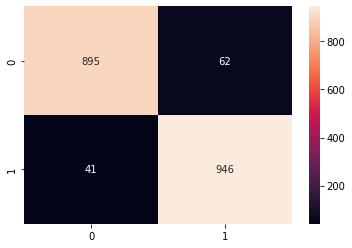

In [63]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
tree_predictions = tree.predict(X_test)
print("Decision Tree accuracy score is:", accuracy_score(y_test, tree_predictions))
print(confusion_matrix(y_test, tree_predictions))
sns.heatmap(confusion_matrix(y_test, tree_predictions), annot=True, fmt='d')

# Random Forest Classifiers and Evaluate the Model

RandomForestClassifier accuracy score is: 0.9696502057613169
[[936  21]
 [ 38 949]]


<AxesSubplot:>

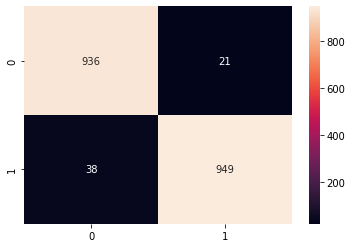

In [64]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)
print("RandomForestClassifier accuracy score is:", accuracy_score(y_test, rf_predictions))
print(confusion_matrix(y_test, rf_predictions))
sns.heatmap(confusion_matrix(y_test, rf_predictions), annot=True, fmt='d')

# Build K Nearest Neighbors Classifier and Evaluate the Model

KNN Model accuracy score is: 0.9506172839506173
[[897  60]
 [ 36 951]]


<AxesSubplot:>

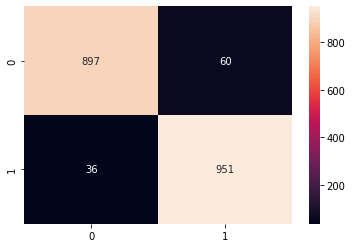

In [73]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)
print("KNN Model accuracy score is:", knn.score(X_test, y_test))
print(confusion_matrix(y_test, knn_predictions))
sns.heatmap(confusion_matrix(y_test, knn_predictions), annot=True, fmt='d')

# Build Logistic Regression Model and Evaluate the Model

LogisticRegression accuracy score is: 0.9202674897119342
[[924  33]
 [122 865]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       957
           1       0.96      0.88      0.92       987

    accuracy                           0.92      1944
   macro avg       0.92      0.92      0.92      1944
weighted avg       0.92      0.92      0.92      1944



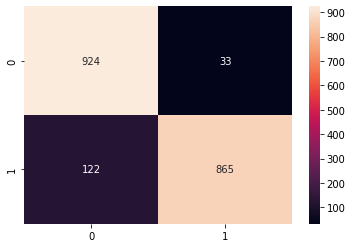

In [66]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_predictions = lr.predict(X_test)
print("LogisticRegression accuracy score is:", lr.score(X_test, y_test))
print(confusion_matrix(y_test, lr_predictions))
sns.heatmap(confusion_matrix(y_test, lr_predictions), annot=True, fmt='d')
print(classification_report(y_test, lr_predictions))

## References
https://seaborn.pydata.org/api.html#categorical-api
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
https://pypi.org/project/imbalanced-learn/#id32
https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html